# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [10]:
# Memuat dataset dari 'data/rumah123_yogya_clustered.csv' ke dalam DataFrame
df = pd.read_csv('data/rumah123_yogya_clustered.csv')

# Menampilkan beberapa baris pertama dari DataFrame untuk memverifikasi data
df.head()

,price,listing-location,bed,bath,carport,surface_area,building_area,price_category,cluster,cluster_selected,pca1,pca2
0,1.079000e+09,36,-0.099434,0.855871,1.342517,-0.003227,0.173104,High,0,0,-3.968938e+08,6.389294
1,1.700000e+08,22,-0.099434,-0.151763,-0.583557,-0.463884,0.474492,Very Low,0,0,-1.305894e+09,-7.450663
2,6.950000e+08,4,-1.089732,-0.151763,-0.583557,-0.515068,-0.015263,Low,0,0,-7.808938e+08,-25.542588
3,5.600000e+08,47,-0.099434,-1.159397,-0.583557,-0.284740,-0.636875,Low,0,0,-9.158938e+08,17.481152
4,2.000000e+08,35,-1.089732,-1.159397,-0.583557,-1.538751,-1.333834,Very Low,0,0,-1.275894e+09,5.544518


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
# Mendefinisikan fitur dan variabel target
X = df.drop(columns=['price_category'])
y = df['price_category']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk dari set pelatihan dan pengujian
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1370, 11), (343, 11), (1370,), (343,))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
# 1. Inisialisasi classifier
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()

# 2. Melatih classifier
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)



KNeighborsClassifier()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Logistic Regression - Accuracy: 1.0, F1 Score: 1.0
Decision Tree - Accuracy: 1.0, F1 Score: 1.0
Random Forest - Accuracy: 1.0, F1 Score: 1.0
K-Nearest Neighbors - Accuracy: 1.0, F1 Score: 1.0


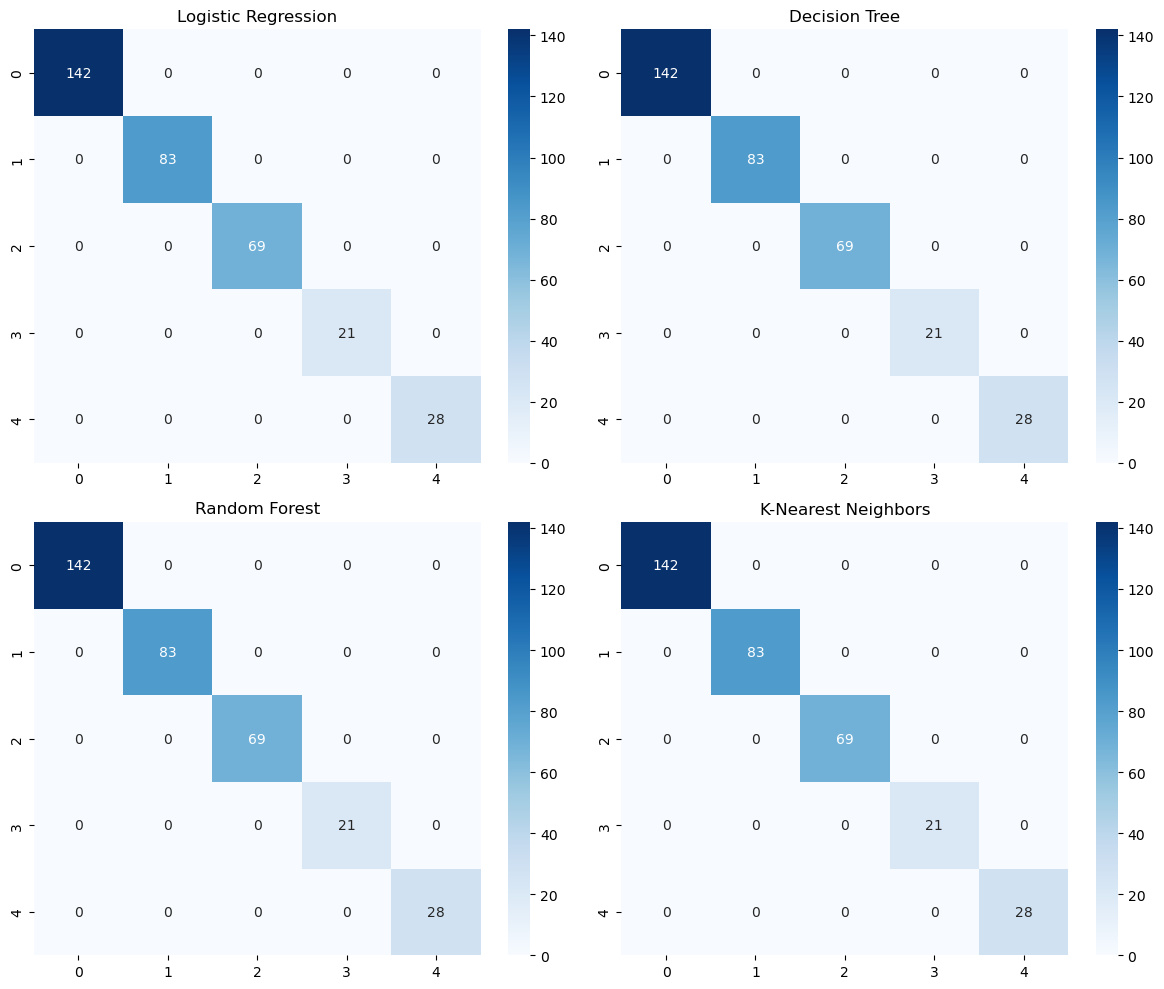

In [13]:
# 1. Membuat prediksi pada set pengujian
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_knn = knn.predict(X_test)


# 2. Menghitung akurasi dan skor F1 untuk setiap classifier
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Mencetak metrik evaluasi
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, F1 Score: {f1_log_reg}")
print(f"Decision Tree - Accuracy: {accuracy_decision_tree}, F1 Score: {f1_decision_tree}")
print(f"Random Forest - Accuracy: {accuracy_random_forest}, F1 Score: {f1_random_forest}")
print(f"K-Nearest Neighbors - Accuracy: {accuracy_knn}, F1 Score: {f1_knn}")

# 3. Plot confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree), annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')

sns.heatmap(confusion_matrix(y_test, y_pred_random_forest), annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('K-Nearest Neighbors')

plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Definisikan parameter grid untuk setiap classifier
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Inisialisasi GridSearchCV untuk setiap classifier
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid_random_forest, cv=5, scoring='accuracy')
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Melatih GridSearchCV untuk setiap classifier
grid_search_log_reg.fit(X_train, y_train)
grid_search_decision_tree.fit(X_train, y_train)
grid_search_random_forest.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)

# Mendapatkan parameter terbaik dan skor terbaik untuk setiap classifier
best_params_log_reg = grid_search_log_reg.best_params_
best_score_log_reg = grid_search_log_reg.best_score_

best_params_decision_tree = grid_search_decision_tree.best_params_
best_score_decision_tree = grid_search_decision_tree.best_score_

best_params_random_forest = grid_search_random_forest.best_params_
best_score_random_forest = grid_search_random_forest.best_score_

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Cetak parameter terbaik dan skor terbaik untuk setiap classifier
print(f"Logistic Regression - Best Params: {best_params_log_reg}, Best Score: {best_score_log_reg}")
print(f"Decision Tree - Best Params: {best_params_decision_tree}, Best Score: {best_score_decision_tree}")
print(f"Random Forest - Best Params: {best_params_random_forest}, Best Score: {best_score_random_forest}")
print(f"K-Nearest Neighbors - Best Params: {best_params_knn}, Best Score: {best_score_knn}")

/opt/miniconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/miniconda3/envs/datascience/lib/python3.12/site-packages/sklearn/utils/optimize.py:311: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Logistic Regression - Best Params: {'C': 0.1, 'solver': 'newton-cg'}, Best Score: 0.9992700729927007
Decision Tree - Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}, Best Score: 0.9992700729927007
Random Forest - Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}, Best Score: 0.9992700729927007
K-Nearest Neighbors - Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}, Best Score: 0.9992700729927007


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Logistic Regression (Best) - Accuracy: 1.0, F1 Score: 1.0
Decision Tree (Best) - Accuracy: 1.0, F1 Score: 1.0
Random Forest (Best) - Accuracy: 1.0, F1 Score: 1.0
K-Nearest Neighbors (Best) - Accuracy: 1.0, F1 Score: 1.0


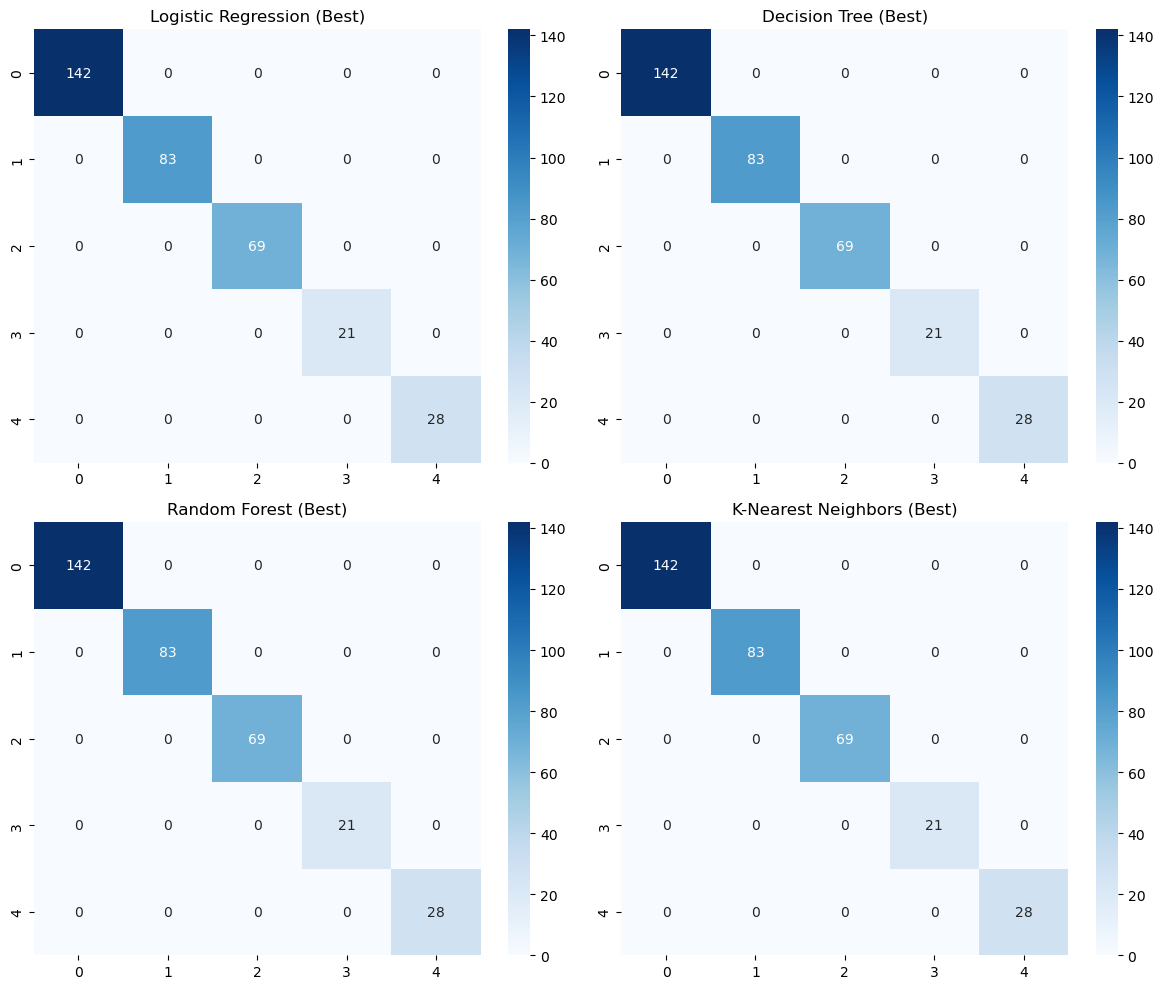

In [15]:
# Evaluasi ulang model dengan hyperparameter terbaik

# Inisialisasi classifier dengan parameter terbaik
log_reg_best = LogisticRegression(**best_params_log_reg, max_iter=1000)
decision_tree_best = DecisionTreeClassifier(**best_params_decision_tree)
random_forest_best = RandomForestClassifier(**best_params_random_forest)
knn_best = KNeighborsClassifier(**best_params_knn)

# Melatih classifier dengan parameter terbaik
log_reg_best.fit(X_train, y_train)
decision_tree_best.fit(X_train, y_train)
random_forest_best.fit(X_train, y_train)
knn_best.fit(X_train, y_train)

# Membuat prediksi pada set pengujian dengan parameter terbaik
y_pred_log_reg_best = log_reg_best.predict(X_test)
y_pred_decision_tree_best = decision_tree_best.predict(X_test)
y_pred_random_forest_best = random_forest_best.predict(X_test)
y_pred_knn_best = knn_best.predict(X_test)

# Menghitung akurasi dan skor F1 untuk setiap classifier dengan parameter terbaik
accuracy_log_reg_best = accuracy_score(y_test, y_pred_log_reg_best)
f1_log_reg_best = f1_score(y_test, y_pred_log_reg_best, average='weighted')

accuracy_decision_tree_best = accuracy_score(y_test, y_pred_decision_tree_best)
f1_decision_tree_best = f1_score(y_test, y_pred_decision_tree_best, average='weighted')

accuracy_random_forest_best = accuracy_score(y_test, y_pred_random_forest_best)
f1_random_forest_best = f1_score(y_test, y_pred_random_forest_best, average='weighted')

accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
f1_knn_best = f1_score(y_test, y_pred_knn_best, average='weighted')

# Mencetak metrik evaluasi untuk parameter terbaik
print(f"Logistic Regression (Best) - Accuracy: {accuracy_log_reg_best}, F1 Score: {f1_log_reg_best}")
print(f"Decision Tree (Best) - Accuracy: {accuracy_decision_tree_best}, F1 Score: {f1_decision_tree_best}")
print(f"Random Forest (Best) - Accuracy: {accuracy_random_forest_best}, F1 Score: {f1_random_forest_best}")
print(f"K-Nearest Neighbors (Best) - Accuracy: {accuracy_knn_best}, F1 Score: {f1_knn_best}")

# Plot confusion matrix untuk parameter terbaik
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg_best), annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression (Best)')

sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree_best), annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree (Best)')

sns.heatmap(confusion_matrix(y_test, y_pred_random_forest_best), annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest (Best)')

sns.heatmap(confusion_matrix(y_test, y_pred_knn_best), annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('K-Nearest Neighbors (Best)')

plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
    - Logistic Regression - Sebelum Tuning: Accuracy: 1.0, F1 Score: 1.0
    - Logistic Regression - Setelah Tuning: Accuracy: 1.0, F1 Score: 1.0
    - Decision Tree - Sebelum Tuning: Accuracy: 1.0, F1 Score: 1.0
    - Decision Tree - Setelah Tuning: Accuracy: 1.0, F1 Score: 1.0
    - Random Forest - Sebelum Tuning: Accuracy: 1.0, F1 Score: 1.0
    - Random Forest - Setelah Tuning: Accuracy: 1.0, F1 Score: 1.0
    - K-Nearest Neighbors - Sebelum Tuning: Accuracy: 1.0, F1 Score: 1.0
    - K-Nearest Neighbors - Setelah Tuning: Accuracy: 1.0, F1 Score: 1.0
2. Identifikasi kelemahan model, seperti:
   - Analisis Kinerja Model dan Rekomendasi:
    > Logistic Regression: Tidak ada peningkatan signifikan setelah tuning. Pertimbangkan untuk mengumpulkan lebih banyak data atau mencoba algoritma yang berbeda.

    > Decision Tree: Tidak ada peningkatan signifikan setelah tuning. Pertimbangkan untuk mengumpulkan lebih banyak data atau mencoba algoritma yang berbeda.

    > Random Forest: Tidak ada peningkatan signifikan setelah tuning. Pertimbangkan untuk mengumpulkan lebih banyak data atau mencoba algoritma yang berbeda.

    > K-Nearest Neighbors: Tidak ada peningkatan signifikan setelah tuning. Pertimbangkan untuk mengumpulkan lebih banyak data atau mencoba algoritma yang berbeda.

   - Memeriksa Overfitting atau Underfitting:
    > Jika akurasi pelatihan jauh lebih tinggi daripada akurasi pengujian, model mungkin overfitting.
    
    > Jika akurasi pelatihan dan pengujian keduanya rendah, model mungkin underfitting.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
   > Kumpulkan lebih banyak data untuk meningkatkan kinerja model.
   
   > Coba algoritma atau metode ensemble yang berbeda.
   
   > Lakukan rekayasa fitur untuk membuat fitur baru.
   
   > Gunakan cross-validation untuk memperkirakan kinerja model dengan lebih baik.
   